In [31]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the forward pass function for a three hidden layer MLP
def forward_pass(input_data, weights, biases):
    # Perform the forward pass through the network
    layer1_input = np.dot(input_data, weights[0]) + biases[0]
    layer1_output = sigmoid(layer1_input)
    layer2_input = np.dot(layer1_output, weights[1]) + biases[1]
    layer2_output = sigmoid(layer2_input)
    layer3_input = np.dot(layer2_output, weights[2]) + biases[2]
    layer3_output = sigmoid(layer3_input)
    output_layer_input = np.dot(layer3_output, weights[3]) + biases[3]
    predicted_output = sigmoid(output_layer_input)
    return predicted_output

# Define the input data
input_data = np.array([[0.05, 0.1]])

# Initialize the weights and biases for a three hidden layer MLP
weights = [np.array([[0.15, 0.2], [0.25, 0.3]]), 
           np.array([[0.4, 0.45], [0.5, 0.55]]), 
           np.array([[0.6, 0.65], [0.7, 0.75]]), 
           np.array([[0.8, 0.85], [0.9, 0.95]])
          ]
biases = [np.array([0.35, 0.35]), np.array([0.6, 0.6]), np.array([0.8, 0.8]), np.array([0.6, 0.6])]

# Perform the forward pass
predicted_output = forward_pass(input_data, weights, biases)
print("Predicted Output:", predicted_output)




Predicted Output: [[0.88748224 0.89580359]]


# Essey 2

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [57]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data = np.array(data)
m,n = data.shape

In [59]:
np.random.shuffle(data)

In [69]:
data_d = data[0:1000].T
Y = data_d[0] #labels
X = data_d[1:n] /255 #features


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_,m_train = X_train.shape

In [70]:
Y_train

array([0, 5, 7, ..., 8, 2, 4], dtype=int64)

In [71]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [72]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 0 8 ... 8 7 7] [0 5 7 ... 8 2 4]
0.10282926829268292
Iteration:  10
[5 8 8 ... 8 7 7] [0 5 7 ... 8 2 4]
0.1671219512195122
Iteration:  20
[5 5 8 ... 8 7 7] [0 5 7 ... 8 2 4]
0.25521951219512196
Iteration:  30
[5 5 8 ... 4 2 7] [0 5 7 ... 8 2 4]
0.3535121951219512
Iteration:  40
[0 5 7 ... 4 6 7] [0 5 7 ... 8 2 4]
0.40709756097560973
Iteration:  50
[0 5 7 ... 4 6 9] [0 5 7 ... 8 2 4]
0.45046341463414635
Iteration:  60
[0 5 7 ... 8 6 9] [0 5 7 ... 8 2 4]
0.49185365853658536
Iteration:  70
[0 5 7 ... 8 6 9] [0 5 7 ... 8 2 4]
0.5289512195121951
Iteration:  80
[0 5 7 ... 8 6 9] [0 5 7 ... 8 2 4]
0.5623658536585366
Iteration:  90
[0 5 7 ... 8 6 9] [0 5 7 ... 8 2 4]
0.5906829268292683
Iteration:  100
[0 5 9 ... 8 2 9] [0 5 7 ... 8 2 4]
0.6152926829268293
Iteration:  110
[0 5 9 ... 8 2 9] [0 5 7 ... 8 2 4]
0.6368048780487805
Iteration:  120
[0 5 9 ... 8 2 9] [0 5 7 ... 8 2 4]
0.6549268292682927
Iteration:  130
[0 5 9 ... 8 2 9] [0 5 7 ... 8 2 4]
0.6712439024390244
Iteration:  

Prediction:  [0]
Label:  0


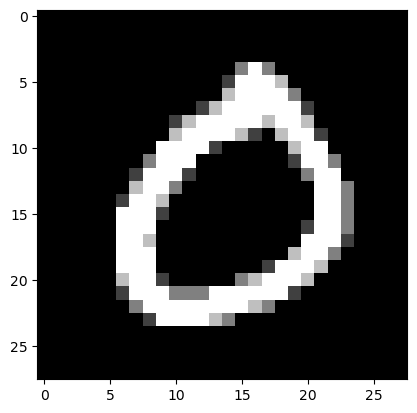

Prediction:  [5]
Label:  5


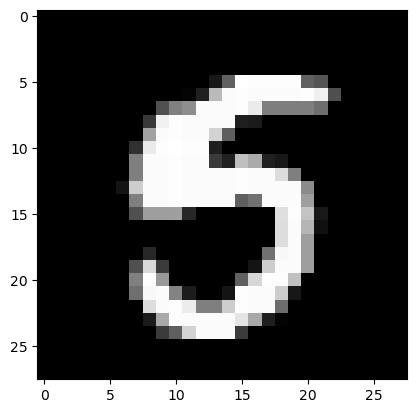

Prediction:  [7]
Label:  7


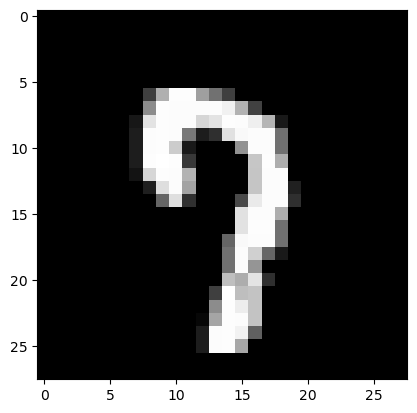

Prediction:  [7]
Label:  7


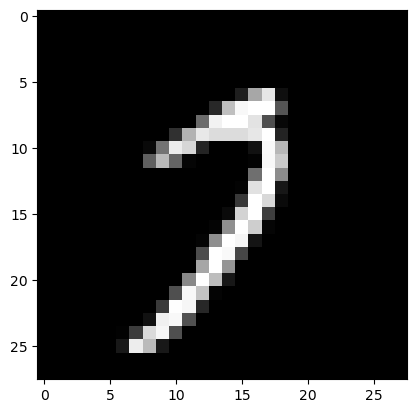

In [73]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [74]:
dev_predictions = make_predictions(X, W1, b1, W2, b2)
print(f"Accuracy : {get_accuracy(dev_predictions, Y) * 100}")

[8 6 7 3 3 2 4 2 9 6 5 4 2 5 0 4 7 9 8 6 5 5 9 1 2 9 7 7 2 1 6 9 4 7 0 4 6
 4 5 0 6 2 0 3 8 7 2 7 9 6 2 0 9 0 2 0 7 6 7 9 1 6 9 4 5 0 9 0 1 1 4 3 9 9
 9 1 8 7 6 0 9 8 7 7 6 7 9 4 8 7 6 0 4 0 0 3 3 0 4 7 1 4 4 5 0 8 3 4 6 4 0
 0 4 9 1 9 9 9 4 7 9 4 6 2 2 6 9 8 3 3 1 1 5 2 0 2 2 5 0 7 0 4 9 8 4 2 9 5
 7 1 9 0 2 3 7 5 3 3 5 1 5 3 1 3 1 9 9 3 6 5 5 8 9 9 3 3 7 1 6 7 1 6 9 7 0
 4 9 1 5 3 2 9 4 2 5 4 6 6 4 9 0 9 1 4 7 0 3 8 8 2 0 7 3 1 3 5 2 5 5 7 0 4
 6 6 3 0 5 8 1 1 0 7 5 7 0 8 8 6 0 5 0 6 2 1 4 6 0 8 4 5 0 3 3 2 4 7 4 9 1
 8 6 6 3 6 7 6 6 4 5 1 5 5 3 7 5 7 0 2 4 4 4 1 0 0 7 4 6 5 3 1 9 3 2 9 7 3
 2 2 6 8 8 7 9 7 9 4 1 1 5 7 5 6 9 7 8 2 2 1 1 6 2 0 7 6 1 8 9 2 2 1 1 0 4
 6 3 3 2 1 0 6 6 7 2 2 9 3 6 9 5 7 6 2 3 4 1 4 4 9 9 9 1 7 4 7 9 7 9 8 9 5
 6 7 6 9 5 4 3 3 0 2 2 6 9 7 4 5 5 2 0 9 7 6 4 3 5 3 0 7 7 8 4 6 5 4 4 3 3
 6 5 2 8 6 4 7 1 6 5 1 9 7 1 9 5 1 1 8 4 9 4 4 1 1 7 1 7 4 1 7 4 9 1 2 1 0
 7 3 0 8 1 1 3 9 4 9 2 1 2 8 0 4 7 2 6 4 5 6 9 4 4 8 6 0 7 2 0 6 9 4 4 6 1
 6 6 8 6 1 5 9 4 6 1 7 2 

# Essay 3 POO55

In [94]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights and biases for the network
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.random.randn(1, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.random.randn(1, output_size)

    def forward(self, x):
        # Perform the forward pass through the network
        self.layer1 = sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.layer2

    def backward(self, x, y, output):
        # Calculate the loss and the gradients of the loss with respect to the weights and biases
        self.output_error = y - output
        self.output_delta = self.output_error * sigmoid_derivative(output)
        self.layer1_error = np.dot(self.output_delta, self.weights2.T)
        self.layer1_delta = self.layer1_error * sigmoid_derivative(self.layer1)
        self.weights1 += np.dot(x.T, self.layer1_delta)
        self.bias1 += np.sum(self.layer1_delta, axis=0, keepdims=True)
        self.weights2 += np.dot(self.layer1.T, self.output_delta)
        self.bias2 += np.sum(self.output_delta, axis=0, keepdims=True)

    def train(self, x, y, epochs):
        # Train the network for a given number of epochs
        for i in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output)

    def predict(self, x):
        # Use the trained network to make predictions on new data
        return self.forward(x)

# Define the input and output data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create an instance of the MLP class
mlp = MLP(2, 4, 1)

# Train the network
mlp.train(x, y, 10000)

# Make predictions on new data
print(mlp.predict(x))


[[0.00782953]
 [0.98766582]
 [0.99312792]
 [0.01138062]]


# Essay 4

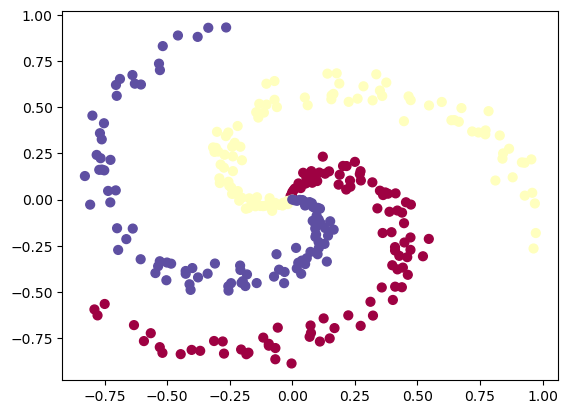

In [130]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [131]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3 
num_examples = X.shape[0]

for i in range(200):
  scores = np.dot(X, W) + b
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))

  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.100651
iteration 10: loss 0.916657
iteration 20: loss 0.848418
iteration 30: loss 0.817375
iteration 40: loss 0.801238
iteration 50: loss 0.792095
iteration 60: loss 0.786605
iteration 70: loss 0.783167
iteration 80: loss 0.780948
iteration 90: loss 0.779482
iteration 100: loss 0.778496
iteration 110: loss 0.777823
iteration 120: loss 0.777359
iteration 130: loss 0.777035
iteration 140: loss 0.776809
iteration 150: loss 0.776648
iteration 160: loss 0.776535
iteration 170: loss 0.776454
iteration 180: loss 0.776396
iteration 190: loss 0.776354


In [132]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


In [145]:
# initialize parameters randomly
h = 100  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters
step_size = 1e-1  # Reduce the learning rate
reg = 1e-4  # regularization strength

# gradient clipping threshold
grad_clip_threshold = 5.0

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]
    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # gradient clipping
    np.clip(dscores, -grad_clip_threshold, grad_clip_threshold, out=dscores)

    # backpropagate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into the hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally backprop into W and b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2


iteration 0: loss 1.098465
iteration 1000: loss 0.703778
iteration 2000: loss 0.633448
iteration 3000: loss 0.409929
iteration 4000: loss 0.282278
iteration 5000: loss 0.224886
iteration 6000: loss 0.192519
iteration 7000: loss 0.172537
iteration 8000: loss 0.157645
iteration 9000: loss 0.146431


In [146]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.96
